In [1]:
%matplotlib inline

In [3]:
from __future__ import division, print_function
import sys,os
import numpy as np, scipy as sp, pandas as pd
import scipy.io
import scipy.signal as signal
import scipy.fftpack as ftpk
import matplotlib.pyplot as plt
import matplotlib

from imp import reload
import auxfilter
import glob

In [4]:
os.chdir('..')
os.getcwd()

'/home/mike/venvs/ml/ml/py'

In [5]:
from eegkaggle.vectorizers import naive
from eegkaggle.dio import dataio

In [6]:
matplotlib.style.use('ggplot')

In [7]:
ssmall,smed, slarge, slong = (4,3), (8,6), (16,12), (16,4)
matplotlib.rcParams['figure.figsize'] = slarge

Functions

Data loading section

In [8]:
basepath = '/home/mike/Downloads/train_1//'
basepathT = '/home/mike/Downloads/test_1/'
# path = basepath + '1_1_1.mat'
# rawdata = matlabtools.get_matlab_eeg_data(path)
# data = rawdata['data']
# print(data.shape)
# SR = rawdata['iEEGsamplingRate'][0][0]
# if SR == int(SR):
#     SR = int(SR)
# print(SR)

In [9]:
sources1 = glob.glob(basepath + '*_1.mat') 
sources0 = glob.glob(basepath + '*_0.mat') 
sourcesT = glob.glob(basepathT + '*.mat')
print(len(sources0), len(sources1), len(sourcesT))

1152 149 1584


In [17]:
reload(naive)
# data =(dataio.get_matlab_eeg_data(sources0[0])['data'])
# print(data.shape)
vec = naive.calculate_features(sources0[1])
# dataio.validcount(data)
print(vec.shape)

(10, 160)


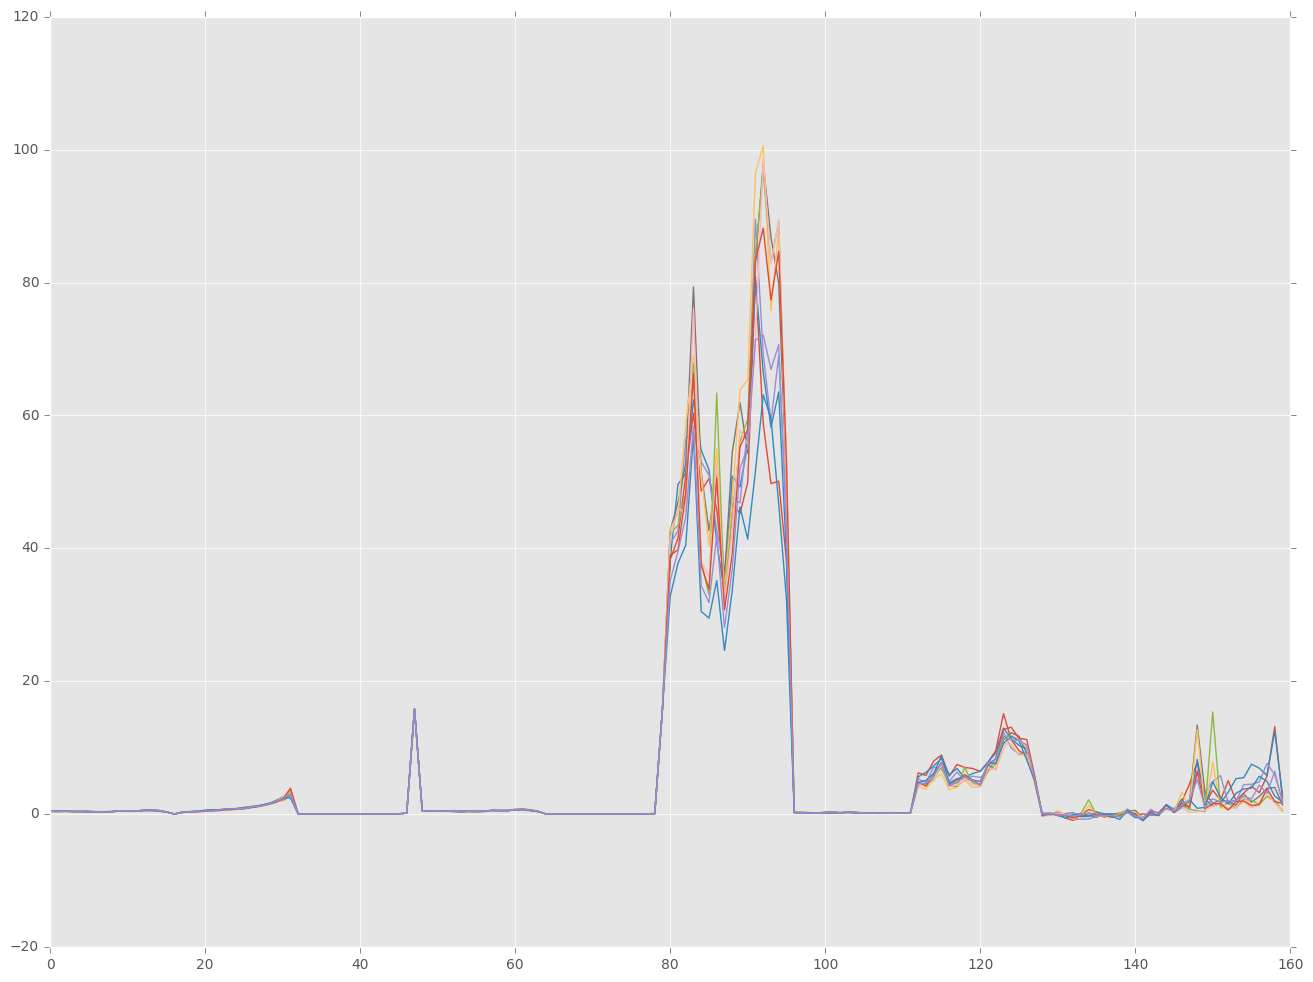

In [22]:
for i in range(10):
    plt.plot(vec[i])

In [ ]:
vec_ary = []
for i in range(10): # len(sources1)[:10]
    print(i)
    try:
        vecs = naive.calculate_features(sources1[i]) 
        vec_ary.append(vecs)
    except ValueError:
        print("fail")

0
1
2
3
4


In [ ]:
vev_ary.shape